In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link="https://drive.google.com/open?id=1mcPILPgJHw3g9BZi7bJVYjep8oCNdXCV"
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('BDL_Jan2019 (1).csv')

In [501]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

Data Prep

In [0]:
dfWeather = pd.read_csv('/content/drive/My Drive/OPIM 5512/Extra Credit/BDL_Jan2019 (1).csv')


In [504]:
dfWeather.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,BDL,1/1/2019 0:00,-72.6825,41.9381,M,M,M,110,5,0.01,30.17,M,7,M,BKN,OVC,M,M,2300,5000,M,M,#NAME?,M,M,M,M,M,M,M,KBDL 010000Z AUTO 11005KT 7SM -RA BKN023 OVC05...
1,BDL,1/1/2019 0:05,-72.6825,41.9381,M,M,M,120,4,0.01,30.16,M,6,M,BKN,BKN,OVC,M,2300,3500,5500,M,#NAME?,M,M,M,M,M,M,M,KBDL 010005Z AUTO 12004KT 6SM -RA BR BKN023 BK...
2,BDL,1/1/2019 0:10,-72.6825,41.9381,M,M,M,110,4,0.02,30.16,M,5,M,BKN,BKN,OVC,M,2300,3800,5000,M,RA BR,M,M,M,M,M,M,M,KBDL 010010Z AUTO 11004KT 5SM RA BR BKN023 BKN...
3,BDL,1/1/2019 0:15,-72.6825,41.9381,M,M,M,110,3,0.03,30.16,M,5,M,BKN,OVC,M,M,2100,5000,M,M,RA BR,M,M,M,M,M,M,M,KBDL 010015Z AUTO 11003KT 5SM RA BR BKN021 OVC...
4,BDL,1/1/2019 0:20,-72.6825,41.9381,M,M,M,100,3,0.04,30.15,M,5,M,BKN,BKN,OVC,M,1800,2300,5500,M,#NAME?,M,M,M,M,M,M,M,KBDL 010020Z AUTO 10003KT 5SM -RA BR BKN018 BK...


In [505]:
dfWeather.shape[0]

9122

In [506]:
dfSub = dfWeather[['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'sknt', 'relh', 'drct', 'p01i', 'alti', 'mslp', 'gust']]
dfSub.head()

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust
0,BDL,1/1/2019 0:00,-72.6825,41.9381,M,M,5,M,110,0.01,30.17,M,M
1,BDL,1/1/2019 0:05,-72.6825,41.9381,M,M,4,M,120,0.01,30.16,M,M
2,BDL,1/1/2019 0:10,-72.6825,41.9381,M,M,4,M,110,0.02,30.16,M,M
3,BDL,1/1/2019 0:15,-72.6825,41.9381,M,M,3,M,110,0.03,30.16,M,M
4,BDL,1/1/2019 0:20,-72.6825,41.9381,M,M,3,M,100,0.04,30.15,M,M


In [507]:
print(dfWeather == ('M' or 'T'))

      station  valid    lon  ...  peak_wind_time   feel  metar
0       False  False  False  ...            True   True  False
1       False  False  False  ...            True   True  False
2       False  False  False  ...            True   True  False
3       False  False  False  ...            True   True  False
4       False  False  False  ...            True   True  False
...       ...    ...    ...  ...             ...    ...    ...
9117    False  False  False  ...            True   True  False
9118    False  False  False  ...            True   True  False
9119    False  False  False  ...            True   True  False
9120    False  False  False  ...           False  False  False
9121    False  False  False  ...            True   True  False

[9122 rows x 31 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [508]:
(dfWeather==('M' or 'T')).sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


station                 0
valid                   0
lon                     0
lat                     0
tmpf                 8239
dwpf                 8239
relh                 8239
drct                  497
sknt                   21
p01i                 7533
alti                    4
mslp                 8403
vsby                    2
gust                 8702
skyc1                 139
skyc2                7139
skyc3                8392
skyc4                9097
skyl1                3461
skyl2                7139
skyl3                8392
skyl4                9097
wxcodes              7638
ice_accretion_1hr    9072
ice_accretion_3hr    9116
ice_accretion_6hr    9113
peak_wind_gust       9022
peak_wind_drct       9022
peak_wind_time       9022
feel                 8239
metar                   0
dtype: int64

In [0]:
dfClean = (dfSub.replace(to_replace=['T','M'],value = np.nan))

In [510]:
(dfClean==('M' or 'T')).sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


station    0
valid      0
lon        0
lat        0
tmpf       0
dwpf       0
sknt       0
relh       0
drct       0
p01i       0
alti       0
mslp       0
gust       0
dtype: int64

In [511]:
dfClean.dropna()

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,BDL,1/27/2019 19:51,-72.6825,41.9381,44.1,27,14,50.73,190,0,29.9,1012.7,25
8297,BDL,1/28/2019 7:51,-72.6825,41.9381,24.1,10,13,54.36,340,0,30.06,1018,18
8950,BDL,1/30/2019 10:51,-72.6825,41.9381,25,15.1,13,65.58,330,0,29.8,1009.5,21
9053,BDL,1/30/2019 18:51,-72.6825,41.9381,27,7,14,42.11,230,0,29.77,1008.3,21


In [0]:
dfClean=(dfClean.dropna())

In [513]:
dfClean.head()

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34


In [514]:
dfClean.dtypes

station     object
valid       object
lon        float64
lat        float64
tmpf        object
dwpf        object
sknt        object
relh        object
drct        object
p01i        object
alti        object
mslp        object
gust        object
dtype: object

In [0]:
dfClean['MONTH'] = dfClean['valid']

In [0]:
dfClean['MONTH']=pd.to_datetime(dfClean['MONTH'])

In [0]:
dfClean['MONTH']=(dfClean['MONTH'].dt.strftime('%m'))

In [0]:
dfClean['DAY'] = dfClean['valid']

In [0]:
dfClean['DAY']=pd.to_datetime(dfClean['DAY'])

In [0]:
dfClean['DAY']=(dfClean['DAY'].dt.strftime('%d'))

In [0]:
dfClean['YEAR'] = dfClean['valid']

In [0]:
dfClean['YEAR']=pd.to_datetime(dfClean['YEAR'])

In [0]:
dfClean['YEAR']=(dfClean['YEAR'].dt.strftime('%Y'))

In [0]:
dfClean['MonthDay'] = dfClean['valid']

In [0]:
dfClean['MonthDay']=pd.to_datetime(dfClean['MonthDay'])

In [0]:
dfClean['MonthDay']=(dfClean['MonthDay'].dt.strftime('%m/%d'))

In [527]:
dfClean.head()

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,MONTH,DAY,YEAR,MonthDay
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26,01,01,2019,01/01
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28,01,01,2019,01/01
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30,01,01,2019,01/01
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26,01,01,2019,01/01
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34,01,01,2019,01/01


In [0]:
##dfClean['MonthDay'] = (dfSub.replace(to_replace=['/'],value = '-'))

In [529]:
dfClean.head()

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,MONTH,DAY,YEAR,MonthDay
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26,01,01,2019,01/01
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28,01,01,2019,01/01
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30,01,01,2019,01/01
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26,01,01,2019,01/01
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34,01,01,2019,01/01


In [0]:
X = dfClean[['tmpf', 'dwpf', 'sknt', 'relh', 'drct', 'p01i', 'alti', 'mslp']]

In [0]:
Y = dfClean['gust']

Data Recoding

In [0]:
dfClean['tmpf'] = dfClean['tmpf'].astype('float')

In [0]:
dfClean['dwpf'] = dfClean['dwpf'].astype('float')

In [0]:
dfClean.loc[(dfClean['tmpf'] < 32) | (dfClean['dwpf'] < 32), 'Hot or Cold'] = "COLD"
dfClean.loc[(dfClean['tmpf'] > 32) | (dfClean['dwpf'] > 32), 'Hot or Cold'] = "HOT"

In [535]:
dfClean.head()

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,MONTH,DAY,YEAR,MonthDay,Hot or Cold
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41.0,17,63.38,320,0,29.68,1005.2,26,01,01,2019,01/01,HOT
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28,01,01,2019,01/01,HOT
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30,01,01,2019,01/01,HOT
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46.0,30.0,17,53.37,330,0,29.81,1009.4,26,01,01,2019,01/01,HOT
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43.0,28.9,27,57.21,300,0,29.88,1011.9,34,01,01,2019,01/01,HOT


In [536]:
(dfClean==('HOT')).sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


station         0
valid           0
lon             0
lat             0
tmpf            0
dwpf            0
sknt            0
relh            0
drct            0
p01i            0
alti            0
mslp            0
gust            0
MONTH           0
DAY             0
YEAR            0
MonthDay        0
Hot or Cold    46
dtype: int64

In [0]:
dfClean['gust'] = dfClean['gust'].astype('float')

In [0]:
dfClean['gust'] = dfClean['gust']*1.15078##have to convert knots to mph

In [0]:
dfClean['sknt'] = dfClean['sknt'].astype('float')

In [0]:
dfClean['sknt'] = dfClean['sknt']*1.15078##have to convert knots to mph

In [541]:
dfClean.head()

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,MONTH,DAY,YEAR,MonthDay,Hot or Cold
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41.0,19.56326,63.38,320,0,29.68,1005.2,29.92028,01,01,2019,01/01,HOT
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,21.86482,49.98,310,0,29.74,1007.3,32.22184,01,01,2019,01/01,HOT
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,23.01560,49.63,310,0,29.77,1008.1,34.52340,01,01,2019,01/01,HOT
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46.0,30.0,19.56326,53.37,330,0,29.81,1009.4,29.92028,01,01,2019,01/01,HOT
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43.0,28.9,31.07106,57.21,300,0,29.88,1011.9,39.12652,01,01,2019,01/01,HOT


In [0]:
dfClean.loc[(dfClean['gust'] < 20) | (dfClean['sknt'] < 20), 'Windy or Calm'] = "CALM"
dfClean.loc[(dfClean['gust'] > 20) | (dfClean['sknt'] > 20), 'Windy or Calm'] = "WINDY"

In [543]:
dfClean.head()

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,MONTH,DAY,YEAR,MonthDay,Hot or Cold,Windy or Calm
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41.0,19.56326,63.38,320,0,29.68,1005.2,29.92028,01,01,2019,01/01,HOT,WINDY
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,21.86482,49.98,310,0,29.74,1007.3,32.22184,01,01,2019,01/01,HOT,WINDY
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,23.01560,49.63,310,0,29.77,1008.1,34.52340,01,01,2019,01/01,HOT,WINDY
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46.0,30.0,19.56326,53.37,330,0,29.81,1009.4,29.92028,01,01,2019,01/01,HOT,WINDY
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43.0,28.9,31.07106,57.21,300,0,29.88,1011.9,39.12652,01,01,2019,01/01,HOT,WINDY


In [544]:
(dfClean==('CALM')).sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


station           0
valid             0
lon               0
lat               0
tmpf              0
dwpf              0
sknt              0
relh              0
drct              0
p01i              0
alti              0
mslp              0
gust              0
MONTH             0
DAY               0
YEAR              0
MonthDay          0
Hot or Cold       0
Windy or Calm    13
dtype: int64

Aggregation

In [545]:
tab = pd.crosstab(dfClean['Hot or Cold'], dfClean['Windy or Calm'])
print(tab)

Windy or Calm  CALM  WINDY
Hot or Cold               
COLD              8     71
HOT               5     41


In [546]:
dfClean['Hot or Cold'].value_counts()


COLD    79
HOT     46
Name: Hot or Cold, dtype: int64

In [547]:
dfClean['Windy or Calm'].value_counts()

WINDY    112
CALM      13
Name: Windy or Calm, dtype: int64

In [548]:
table = (dfClean['Hot or Cold'].value_counts(),dfClean['Windy or Calm'].value_counts())
print(table)

(COLD    79
HOT     46
Name: Hot or Cold, dtype: int64, WINDY    112
CALM      13
Name: Windy or Calm, dtype: int64)


In [549]:
dfClean.groupby('MonthDay')[['sknt', 'tmpf']].mean()

,sknt,tmpf
MonthDay,,
01/01,20.570192,44.862500
01/02,11.507800,37.000000
01/03,18.028887,41.666667
01/04,11.507800,39.000000
01/06,17.031544,39.040000
01/07,15.919123,25.683333
01/09,17.426097,38.828571
01/10,18.412480,30.176471
01/11,15.995842,22.700000


Plots

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Wind Speed Histogram')

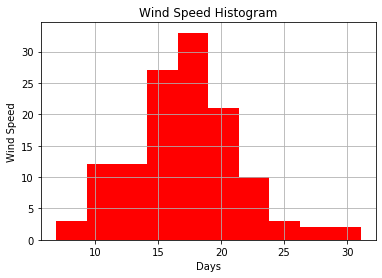

In [551]:
dfClean['sknt'].hist(facecolor='red')
plt.xlabel('Days')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Histogram')

Text(0.5, 1.0, 'Temperature KDE Plot')

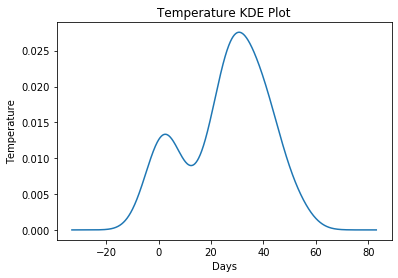

In [552]:
dfClean['tmpf'].plot.kde()##only change color of histogram
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Temperature KDE Plot')

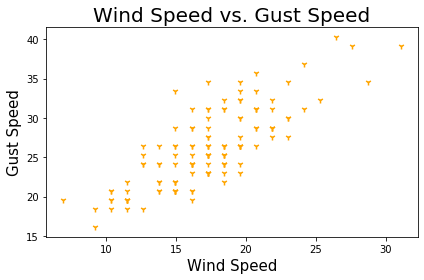

In [553]:
fig, ax = plt.subplots()
ax.scatter(x=dfClean.sknt, y=dfClean.gust, marker="1", color="orange")
ax.set_xlabel("Wind Speed", fontsize=15)
ax.set_ylabel("Gust Speed", fontsize=15)
ax.set_title("Wind Speed vs. Gust Speed", fontsize=20)

fig.tight_layout()
# show the plot
plt.show()

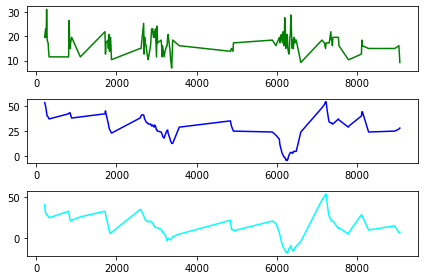

In [554]:
fig, axes = plt.subplots(3) # rows, columns


axes[0].plot(dfClean.sknt, color='green') 


axes[1].plot(dfClean.tmpf, color='blue') 


axes[2].plot(dfClean.dwpf, color='cyan') 

fig.tight_layout()
# show the plot
plt.show()

Modeling

In [555]:
dfClean.dtypes

station           object
valid             object
lon              float64
lat              float64
tmpf             float64
dwpf             float64
sknt             float64
relh              object
drct              object
p01i              object
alti              object
mslp              object
gust             float64
MONTH             object
DAY               object
YEAR              object
MonthDay          object
Hot or Cold       object
Windy or Calm     object
dtype: object

In [0]:
dfClean['relh'] = dfClean['relh'].astype('float')

In [0]:
dfClean['drct'] = dfClean['drct'].astype('float')

In [0]:
dfClean['p01i'] = dfClean['p01i'].astype('float')

In [0]:
dfClean['alti'] = dfClean['alti'].astype('float')

In [0]:
dfClean['mslp'] = dfClean['mslp'].astype('float')

In [0]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [562]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
X_poly = poly_features.fit_transform(X)
tmpX = pd.DataFrame(X_poly)

print("Original Data")
print(X.head()) 
print("##########################")
print("Poly Features")
print(tmpX.head())

Original Data
     tmpf  dwpf sknt   relh drct p01i   alti    mslp
207  53.1    41   17  63.38  320    0  29.68  1005.2
220  51.1  33.1   19  49.98  310    0  29.74  1007.3
232  48.9  30.9   20  49.63  310    0  29.77  1008.1
244    46    30   17  53.37  330    0  29.81  1009.4
255    43  28.9   27  57.21  300    0  29.88  1011.9
##########################
Poly Features
    0     1     2     3      4   ...   40   41        42         43          44
0  1.0  53.1  41.0  17.0  63.38  ...  0.0  0.0  880.9024  29834.336  1010427.04
1  1.0  51.1  33.1  19.0  49.98  ...  0.0  0.0  884.4676  29957.102  1014653.29
2  1.0  48.9  30.9  20.0  49.63  ...  0.0  0.0  886.2529  30011.137  1016265.61
3  1.0  46.0  30.0  17.0  53.37  ...  0.0  0.0  888.6361  30090.214  1018888.36
4  1.0  43.0  28.9  27.0  57.21  ...  0.0  0.0  892.8144  30235.572  1023941.61

[5 rows x 45 columns]


In [0]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression() # specifies an empty model
poly_model.fit(X_train, y_train)
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train)
# predicting on test data-set
y_test_predict = poly_model.predict(X_test)

Text(0.5, 1.0, 'Validation - PolyFit')

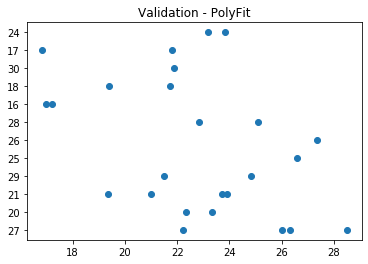

In [564]:

plt.plot(y_test_predict,
         y_test,
         'o')
plt.title('Validation - PolyFit')

In [0]:
##The log did not run sometimes. I had to re-run X and Y above. It's weird

In [0]:
X = dfClean[['tmpf', 'dwpf', 'sknt', 'relh', 'drct', 'p01i', 'alti', 'mslp']]

In [0]:
Y = dfClean['gust']

In [568]:
X_log = np.log(X)
tmp = pd.DataFrame(X_log)
print(tmp.shape)
tmp.head()

(125, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp
207,3.972177,3.713572,2.973653,4.149148,5.768321,-inf,3.390473,6.912942
220,3.933784,3.499533,3.084879,3.911623,5.736572,-inf,3.392493,6.915029
232,3.889777,3.430756,3.136172,3.904595,5.736572,-inf,3.393501,6.915823
244,3.828641,3.401197,2.973653,3.977249,5.799093,-inf,3.394844,6.917111
255,3.761200,3.363842,3.436277,4.046729,5.703782,-inf,3.397189,6.919585


In [569]:
X_log[np.isneginf(X_log)] = 0
X_log.head()

,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp
207,3.972177,3.713572,2.973653,4.149148,5.768321,0.0,3.390473,6.912942
220,3.933784,3.499533,3.084879,3.911623,5.736572,0.0,3.392493,6.915029
232,3.889777,3.430756,3.136172,3.904595,5.736572,0.0,3.393501,6.915823
244,3.828641,3.401197,2.973653,3.977249,5.799093,0.0,3.394844,6.917111
255,3.761200,3.363842,3.436277,4.046729,5.703782,0.0,3.397189,6.919585


In [0]:
# fit the model

# fit the log transformed features to Linear Regression
log_model = LinearRegression() # specifies an empty model
log_model.fit(X_train, y_train)
# predicting on training data-set
y_train_predicted = log_model.predict(X_train)
# predicting on test data-set
y_test_predict = log_model.predict(X_test)

Text(0.5, 1.0, 'Validation - LogFit')

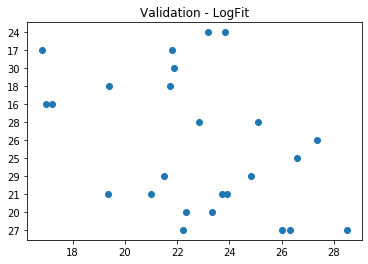

In [571]:
plt.plot(y_test_predict,
         y_test,
         'o')
plt.title('Validation - LogFit')

In [0]:
def Regression_evaluation_matrics(pred, actual):
  act = actual.to_numpy()
  d = pred - act
  mae = np.mean(np.absolute(d))
  print('MAE: ', round(mae,2))

In [573]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet
alphas = [0.01, 0.1, 1, 10, 100, 1000] # this is essentially our values
# to search from, combines both penalties (literally!)

# X_train, X_test, y_train, y_test

# right now we will use the ElasticNet on the Sonar Dataset
# you could apply this on the housing and breast cancer examples
# if you wanted to
for a in alphas:
  # can try dif values for tolerance (convergence warning)
  model = ElasticNet(alpha=a, max_iter=10000, tol=0.01).fit(X_train, y_train)   
  score = model.score(X_train, y_train)
  y_pred = model.predict(X_train)
  #pred_y = model.predict(y_train)
  print("Alpha:{0:.4f}, R2:{1:.2f}".format(a, score),"TRAIN")
  print(mean_absolute_error(y_train,y_pred), "MAE")

Alpha:0.0100, R2:0.69 TRAIN
1.9667713928525643 MAE
Alpha:0.1000, R2:0.69 TRAIN
1.9739210107522007 MAE
Alpha:1.0000, R2:0.69 TRAIN
1.9883732362169104 MAE
Alpha:10.0000, R2:0.47 TRAIN
2.4492502652687604 MAE
Alpha:100.0000, R2:0.00 TRAIN
3.2499999999999996 MAE
Alpha:1000.0000, R2:0.00 TRAIN
3.2499999999999996 MAE


In [574]:
model = ElasticNet(alpha=.01, max_iter=10000, tol=0.01).fit(X_train, y_train)   
score = model.score(X_train, y_train)
y_pred = model.predict(X_train)
#mae = mean_absolute_error(y_test, model.predict(y_test))
print("Alpha:{0:.4f}, R2:{1:.2f}".format(.01, score),"TEST")
print(mean_absolute_error(y_train,y_pred), "MAE")

Alpha:0.0100, R2:0.69 TEST
1.9667713928525643 MAE


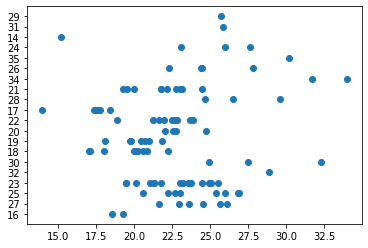

In [575]:
plt.plot(y_pred,
         y_train,
         'o')

In [576]:
alphas = [0.01, 0.1, 1, 10, 100, 1000] # this is essentially our values
# to search from, combines both penalties (literally!)

# X_train, X_test, y_train, y_test

# right now we will use the ElasticNet on the Sonar Dataset
# you could apply this on the housing and breast cancer examples
# if you wanted to
for a in alphas:
  model = ElasticNet(alpha=a, max_iter=10000, tol=0.01).fit(X_test, y_test)   
  score = model.score(X_test, y_test)
  y_pred = model.predict(X_test)
  #mae = mean_absolute_error(y_test, model.predict(y_test))
  print("Alpha:{0:.4f}, R2:{1:.2f}".format(a, score),"TEST")
  print(mean_absolute_error(y_test,y_pred), "MAE")

Alpha:0.0100, R2:0.64 TEST
2.1763417057791616 MAE
Alpha:0.1000, R2:0.59 TEST
2.2771094127337985 MAE
Alpha:1.0000, R2:0.50 TEST
2.4926143476132223 MAE
Alpha:10.0000, R2:0.30 TEST
3.3438537622993385 MAE
Alpha:100.0000, R2:0.00 TEST
4.0768 MAE
Alpha:1000.0000, R2:0.00 TEST
4.0768 MAE


In [577]:
model = ElasticNet(alpha=.01, max_iter=10000, tol=0.01).fit(X_test, y_test)   
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
#mae = mean_absolute_error(y_test, model.predict(y_test))
print("Alpha:{0:.4f}, R2:{1:.2f}".format(.01, score),"TEST")

Alpha:0.0100, R2:0.64 TEST


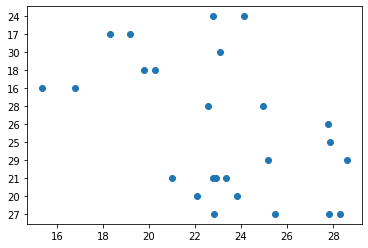

In [578]:
plt.plot(y_pred,
         y_test,
         'o')

Larger Dataset Below, Smaller One Above

In [579]:
print(type(X_log), type(X_poly)) #X_poly was a numpy array
X_poly = pd.DataFrame(X_poly)
print(type(X_log), type(X_poly)) # now it's a dataframe

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [580]:
X_smoosh = pd.concat([X_poly, X_log], axis=1)
X_smoosh.shape # look at how many more columns there are

(250, 53)

In [0]:
list = []
for i in range(125):
    list.append(i)
X_poly['index'] = list
X_log['index'] = list

In [596]:
X_smoosh = X_poly.merge(X_log, left_on="index", right_on='index')
X_smoosh = X_smoosh.drop(columns='index')
X_smoosh.shape

(125, 53)

In [597]:
X_smoosh.head

<bound method NDFrame.head of        0     1     2     3      4  ...      relh      drct  p01i      alti      mslp
0    1.0  53.1  41.0  17.0  63.38  ...  4.149148  5.768321   0.0  3.390473  6.912942
1    1.0  51.1  33.1  19.0  49.98  ...  3.911623  5.736572   0.0  3.392493  6.915029
2    1.0  48.9  30.9  20.0  49.63  ...  3.904595  5.736572   0.0  3.393501  6.915823
3    1.0  46.0  30.0  17.0  53.37  ...  3.977249  5.799093   0.0  3.394844  6.917111
4    1.0  43.0  28.9  27.0  57.21  ...  4.046729  5.703782   0.0  3.397189  6.919585
..   ...   ...   ...   ...    ...  ...       ...       ...   ...       ...       ...
120  1.0  44.1  27.0  14.0  50.73  ...  3.926517  5.247024   0.0  3.397858  6.920375
121  1.0  24.1  10.0  13.0  54.36  ...  3.995629  5.828946   0.0  3.403195  6.925595
122  1.0  25.0  15.1  13.0  65.58  ...  4.183271  5.799093   0.0  3.394508  6.917210
123  1.0  27.0   7.0  14.0  42.11  ...  3.740285  5.438079   0.0  3.393501  6.916021
124  1.0  28.0   7.0   8.0  40.41  

In [598]:
X_smoosh[np.isneginf(X_smoosh)] = 0
X_smoosh.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp
0,1.0,53.1,41.0,17.0,63.38,320.0,0.0,29.68,1005.2,2819.61,2177.10,902.7,3365.478,16992.0,0.0,1576.008,53376.12,1681.00,697.0,2598.580,13120.0,0.0,1216.880,41213.20,289.0,1077.46,5440.0,0.0,504.56,17088.4,4017.0244,20281.6,0.0,1881.1184,63709.576,102400.0,0.0,9497.6,321664.0,0.0,0.0,0.0,880.9024,29834.336,1010427.04,3.972177,3.713572,2.973653,4.149148,5.768321,0.0,3.390473,6.912942
1,1.0,51.1,33.1,19.0,49.98,310.0,0.0,29.74,1007.3,2611.21,1691.41,970.9,2553.978,15841.0,0.0,1519.714,51473.03,1095.61,628.9,1654.338,10261.0,0.0,984.394,33341.63,361.0,949.62,5890.0,0.0,565.06,19138.7,2498.0004,15493.8,0.0,1486.4052,50344.854,96100.0,0.0,9219.4,312263.0,0.0,0.0,0.0,884.4676,29957.102,1014653.29,3.933784,3.499533,3.084879,3.911623,5.736572,0.0,3.392493,6.915029
2,1.0,48.9,30.9,20.0,49.63,310.0,0.0,29.77,1008.1,2391.21,1511.01,978.0,2426.907,15159.0,0.0,1455.753,49296.09,954.81,618.0,1533.567,9579.0,0.0,919.893,31150.29,400.0,992.60,6200.0,0.0,595.40,20162.0,2463.1369,15385.3,0.0,1477.4851,50032.003,96100.0,0.0,9228.7,312511.0,0.0,0.0,0.0,886.2529,30011.137,1016265.61,3.889777,3.430756,3.136172,3.904595,5.736572,0.0,3.393501,6.915823
3,1.0,46.0,30.0,17.0,53.37,330.0,0.0,29.81,1009.4,2116.00,1380.00,782.0,2455.020,15180.0,0.0,1371.260,46432.40,900.00,510.0,1601.100,9900.0,0.0,894.300,30282.00,289.0,907.29,5610.0,0.0,506.77,17159.8,2848.3569,17612.1,0.0,1590.9597,53871.678,108900.0,0.0,9837.3,333102.0,0.0,0.0,0.0,888.6361,30090.214,1018888.36,3.828641,3.401197,2.973653,3.977249,5.799093,0.0,3.394844,6.917111
4,1.0,43.0,28.9,27.0,57.21,300.0,0.0,29.88,1011.9,1849.00,1242.70,1161.0,2460.030,12900.0,0.0,1284.840,43511.70,835.21,780.3,1653.369,8670.0,0.0,863.532,29243.91,729.0,1544.67,8100.0,0.0,806.76,27321.3,3272.9841,17163.0,0.0,1709.4348,57890.799,90000.0,0.0,8964.0,303570.0,0.0,0.0,0.0,892.8144,30235.572,1023941.61,3.761200,3.363842,3.436277,4.046729,5.703782,0.0,3.397189,6.919585


In [0]:
X_train ,X_test, y_train, y_test = train_test_split(X_smoosh, Y, test_size=0.2, random_state=7)

In [600]:
alphas = [0.01, 0.1, 1, 10, 100, 1000] # this is essentially our values
# to search from, combines both penalties (literally!)

# X_train, X_test, y_train, y_test

# right now we will use the ElasticNet on the Sonar Dataset
# you could apply this on the housing and breast cancer examples
# if you wanted to
for a in alphas:
  model = ElasticNet(alpha=a, max_iter=10000, tol=0.01).fit(X_train, y_train)   
  score = model.score(X_train, y_train)
  y_pred = model.predict(X_train)
  print("Alpha:{0:.4f}, R2:{1:.2f}".format(a, score),"TRAIN")
  print(mean_absolute_error(y_train,y_pred), "MAE")

ValueError: ignored

In [0]:
model = ElasticNet(alpha=.01, max_iter=10000, tol=0.01).fit(X_train, y_train)   
score = model.score(X_train, y_train)
y_pred = model.predict(X_train)
#mae = mean_absolute_error(y_test, model.predict(y_test))
print("Alpha:{0:.4f}, R2:{1:.2f}".format(.01, score),"TEST")
print(mean_absolute_error(y_train,y_pred), "MAE")

In [0]:
plt.plot(y_pred,
         y_train,
         'o')

In [0]:
alphas = [0.01, 0.1, 1, 10, 100, 1000] # this is essentially our values
# to search from, combines both penalties (literally!)

# X_train, X_test, y_train, y_test

# right now we will use the ElasticNet on the Sonar Dataset
# you could apply this on the housing and breast cancer examples
# if you wanted to
for a in alphas:
  model = ElasticNet(alpha=a, max_iter=10000, tol=0.01).fit(X_test, y_test)   
  score = model.score(X_test, y_test)
  y_pred = model.predict(X_test)
  print("Alpha:{0:.4f}, R2:{1:.2f}".format(a, score),"TEST")
  print(mean_absolute_error(y_test,y_pred), "MAE")

In [0]:
model = ElasticNet(alpha=.01, max_iter=10000, tol=0.01).fit(X_test, y_test)   
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
#mae = mean_absolute_error(y_test, model.predict(y_test))
print("Alpha:{0:.4f}, R2:{1:.2f}".format(.01, score),"TEST")

In [0]:
plt.plot(y_pred,
         y_test,
         'o')

The best of the small models was with an alpha of .01, as seen above. At this moment I have a NaN error with the "giant dataset" but assuming that the objective is to understand model simplicity, if the models were incredibly close in R2 and MAE you would take the simpler model as it significantly reduces complexity in the model, and should be easier to understand. Although it is generally the goal to achieve the best R2 and MAE, we have to understand that reduced complexity would be the best objective in close situations. Also a reduction in complexity makes the model easier to explain.